In [1]:
# import required models
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt 

In [2]:
# load the data
face_data = fetch_lfw_people(min_faces_per_person=80)

In [3]:

X = face_data.data
Y = face_data.target
print("Input data size",X.shape)
print("Output data size: ",Y.shape)
print("Label names: ",face_data.target_names)

Input data size (1140, 2914)
Output data size:  (1140,)
Label names:  ['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']


In [4]:
for i in range(5):
    print(f"Class {i} has {(Y==i).sum()} samples.")

Class 0 has 236 samples.
Class 1 has 121 samples.
Class 2 has 530 samples.
Class 3 has 109 samples.
Class 4 has 144 samples.


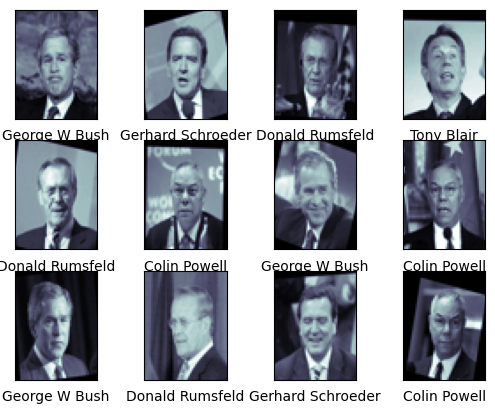

In [5]:
fig,ax = plt.subplots(3,4)
for i,axi in enumerate(ax.flat):
    axi.imshow(face_data.images[i],cmap="bone")
    axi.set(xticks=[],yticks=[],xlabel=face_data.target_names[face_data.target[i]])

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

In [7]:
clf = SVC(class_weight="balanced",random_state=42)
model = clf.fit(X_train, Y_train)
pred = model.predict(X_test)

In [8]:
print('The best model:\n', pred)

The best model:
 [0 2 2 3 2 2 0 2 2 2 0 2 1 0 2 0 4 4 2 0 0 2 1 2 4 0 4 2 2 1 3 1 2 0 0 0 2
 0 3 4 3 2 0 2 3 3 2 2 0 1 0 0 0 0 2 2 2 2 2 0 2 2 2 0 0 4 3 2 0 2 4 2 0 3
 2 2 2 4 2 4 1 2 2 1 4 1 2 2 0 1 2 2 4 4 2 0 0 0 2 3 2 4 0 2 2 4 2 1 2 2 4
 2 2 2 0 2 2 1 2 1 3 0 3 0 0 1 3 1 2 4 2 1 0 0 4 2 3 4 0 4 2 0 2 1 2 0 4 2
 2 2 0 2 2 2 2 3 0 2 0 4 0 2 1 1 2 1 2 2 1 4 1 2 2 2 0 2 2 1 2 0 4 0 4 2 4
 2 2 1 2 0 2 2 4 2 0 0 4 2 0 2 0 0 0 3 2 2 0 1 0 2 3 4 2 4 2 1 2 2 4 2 2 3
 0 0 1 2 0 2 2 2 2 0 2 2 0 0 2 2 2 3 1 2 2 2 2 0 2 2 0 2 2 2 0 0 3 2 4 2 0
 2 3 2 2 1 4 2 2 0 4 3 1 3 3 0 0 2 4 1 2 3 2 0 2 1 4]


In [9]:
print(classification_report(Y_test,pred,target_names=face_data.target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.76      0.81      0.79        64
  Donald Rumsfeld       0.71      0.69      0.70        32
    George W Bush       0.83      0.83      0.83       127
Gerhard Schroeder       0.75      0.62      0.68        29
       Tony Blair       0.57      0.61      0.59        33

         accuracy                           0.76       285
        macro avg       0.72      0.71      0.72       285
     weighted avg       0.76      0.76      0.76       285

